Import relevant libraries

In [194]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
import tensorflow as tf
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle
from PIL import Image
from six.moves import range

# Config the matlotlib backend as plotting inline in IPython
%matplotlib inline

In [109]:
train_folder = "Train"
test_folder = "Test"
dimensions = (50, 50)

max_angle = 15

def rotate_img(image, angle, color, filter = Image.NEAREST):
    
    if image.mode == "P" or filter == Image.NEAREST:
        matte = Image.new("1", image.size, 1) # mask
    else:
        matte = Image.new("L", image.size, 255) # true matte
    bg = Image.new(image.mode, image.size, color)
    bg.paste(
        image.rotate(angle, filter), 
        matte.rotate(angle, filter)
    )
    return bg

def make_greyscale_white_bg(im, r, b, g):

    im = im.convert('RGBA')   # Convert to RGBA
    
    
    data = np.array(im)   # "data" is a height x width x 4 numpy array
    red, green, blue, alpha = data.T # Temporarily unpack the bands for readability

    # Replace grey with white... (leaves alpha values alone...)
    grey_areas = (red == r) & (blue == b) & (green == g)
    data[..., :-1][grey_areas.T] = (255, 255, 255) # Transpose back needed
    
    im2 = Image.fromarray(data)
    im2 = im2.convert('L')   # convert to greyscale image
    
    
    
    #im2.show()
    
    return im2

def random_rotate(img, copies, curr_filename, path):
    
    c_color = img.getpixel((0,0))
    
    for i in range(copies):
        
        new_im = rotate_img(img, np.random.randint((0 - max_angle), max_angle), c_color)
        new_im.save(os.path.join(path, "bcc" + str(curr_filename).zfill(6) + ".bmp"))
        
        curr_filename = curr_filename + 1
        
    
    

def augment_by_rotations(folder, prev_cnt):
    
    classes = [os.path.join(folder, d) for d in sorted(os.listdir(folder))]  # get list of all sub-folders in folder
    
    for path_to_folder in classes: 
    
        if os.path.isdir(path_to_folder):
            images = [os.path.join(path_to_folder, i) for i in sorted(os.listdir(path_to_folder)) if i != '.DS_Store']
            filename = prev_cnt
            for image in images:

                im = Image.open(image)

                random_rotate(im, 4, filename, path_to_folder)
                filename = filename + 4

            print("Finished augmenting " + path_to_folder)
        
        

def invert_colors(im):
    
    im = im.convert('RGBA')   # Convert to RGBA  
    data = np.array(im)   # "data" is a height x width x 4 numpy array
    red, green, blue, alpha = data.T # Temporarily unpack the bands for readability
    

    # Replace grey with white... (leaves alpha values alone...)
    black_areas = (red == 0) & (blue == 0) & (green == 0)
    data[..., :-1][black_areas.T] = (255, 0, 0) # Transpose back needed
    
    white_areas = (red == 255) & (blue == 255) & (green == 255)
    data[..., :-1][white_areas.T] = (0, 0, 0) # Transpose back needed
    
    red_areas = (red == 255) & (blue == 0) & (green == 0)
    data[..., :-1][red_areas.T] = (255, 255, 255) # Transpose back needed

    im2 = Image.fromarray(data)
    im2 = im2.convert('L')   # convert to greyscale image
    
    
    
    #im2.show()
    
    return im2
    
    

def test_rotations():
        
    img = Image.open("Train/172/bcc000002.bmp")
    
    #img = img.rotate(30)
    
    img = img.resize(dimensions)
    
    
    
    rot = make_greyscale_white_bg(img, 127, 127, 127)
    
    rot = invert_colors(rot)
    c_color = rot.getpixel((0, 0))
    rot = rotate_img(rot, 10, c_color)
    
    w, h = rot.size
    rot.show()
    
    
    
def process_images(folder):
    
    classes = [os.path.join(folder, d) for d in sorted(os.listdir(folder))]  # get list of all sub-folders in folder
    img_cnt = 0
    
    for class_x in classes:
        
        if os.path.isdir(class_x):
            
            # get paths to all the images in this folder
            images = [os.path.join(class_x, i) for i in sorted(os.listdir(class_x)) if i != '.DS_Store']
            
            for image in images:
                
                img_cnt = img_cnt + 1
                
                if(img_cnt % 1000 == 0): 
                    print("Processed %s images" % str(img_cnt))
                
                im = Image.open(image)
                im = im.resize(dimensions)   # resize image according to dimensions set
                
                im = make_greyscale_white_bg(im, 127, 127, 127) # turn grey background (if any) to white, and
                                                                  # convert into greyscale image with 1 channel
                    
                im = invert_colors(im)
                im.save(image)   # overwrite previous image file with new image
                
    print("Finished processing images, images found = ")
    print(img_cnt)
                
#process_images(test_folder)
#process_images(train_folder)

#augment_by_rotations("Train/172")

augment_by_rotations(train_folder, 240)
    

Finished augmenting Train/172
Finished augmenting Train/173
Finished augmenting Train/174
Finished augmenting Train/175
Finished augmenting Train/176
Finished augmenting Train/177
Finished augmenting Train/178
Finished augmenting Train/179
Finished augmenting Train/180
Finished augmenting Train/181
Finished augmenting Train/182
Finished augmenting Train/183
Finished augmenting Train/184
Finished augmenting Train/185
Finished augmenting Train/186
Finished augmenting Train/187
Finished augmenting Train/188
Finished augmenting Train/189
Finished augmenting Train/190
Finished augmenting Train/191
Finished augmenting Train/192
Finished augmenting Train/193
Finished augmenting Train/194
Finished augmenting Train/195
Finished augmenting Train/196
Finished augmenting Train/197
Finished augmenting Train/198
Finished augmenting Train/199
Finished augmenting Train/200
Finished augmenting Train/201
Finished augmenting Train/202
Finished augmenting Train/203
Finished augmenting Train/204
Finished a

Convert the entire dataset into a 3D array (image index, x, y) of floating point values, normalized to have approximately zero mean and standard deviation ~0.5 to make training easier.

In [195]:
image_size = 50  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.


def load_letter(folder, min_num_images):
  """Load the data for a single letter label."""

  image_files = os.listdir(folder)
  dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
  print(folder)
    
  num_images = 0
  for image_index, image in enumerate(image_files):
    image_file = os.path.join(folder, image)
    try:
      image_data = (ndimage.imread(image_file).astype(float) - 
                    pixel_depth / 2) / pixel_depth
      if image_data.shape != (image_size, image_size):
        raise Exception('Unexpected image shape: %s' % str(image_data.shape))
      dataset[num_images, :, :] = image_data
      num_images = num_images + 1
    except IOError as e:
      print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    
  dataset = dataset[0:num_images, :, :]
  if num_images < min_num_images:
    raise Exception('Many fewer images than expected: %d < %d' %
                    (num_images, min_num_images))
    
  print('Full dataset tensor:', dataset.shape)
  print('Mean:', np.mean(dataset))
  print('Standard deviation:', np.std(dataset))
  return dataset
        
def maybe_pickle(data_folders, min_num_images_per_class, force=False):
  dataset_names = []
  folders_list = os.listdir(data_folders)
  for folder in folders_list:
        
    #print(os.path.join(data_folders, folder))
    curr_folder_path = os.path.join(data_folders, folder)
    if os.path.isdir(curr_folder_path):
        set_filename = curr_folder_path + '.pickle'
        dataset_names.append(set_filename)
        if os.path.exists(set_filename) and not force:
          # You may override by setting force=True.
          print('%s already present - Skipping pickling.' % set_filename)
        else:
          print('Pickling %s.' % set_filename)
          dataset = load_letter(curr_folder_path, min_num_images_per_class)
          try:
            with open(set_filename, 'wb') as f:
                pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
                f.close()
          except Exception as e:
            print('Unable to save data to', set_filename, ':', e)
  
  return dataset_names

train_datasets = maybe_pickle(train_folder, 1050, True)
test_datasets = maybe_pickle(test_folder, 58, True)

Pickling Train/172.pickle.
Train/172
Could not read: Train/172/.DS_Store : cannot identify image file <open file 'Train/172/.DS_Store', mode 'rb' at 0x108ce3c90> - it's ok, skipping.
Full dataset tensor: (1100, 50, 50)
Mean: -0.24997
Standard deviation: 0.432756
Pickling Train/173.pickle.
Train/173
Could not read: Train/173/.DS_Store : cannot identify image file <open file 'Train/173/.DS_Store', mode 'rb' at 0x108687a50> - it's ok, skipping.
Full dataset tensor: (1200, 50, 50)
Mean: -0.211432
Standard deviation: 0.453097
Pickling Train/174.pickle.
Train/174
Could not read: Train/174/.DS_Store : cannot identify image file <open file 'Train/174/.DS_Store', mode 'rb' at 0x108ce3c90> - it's ok, skipping.
Full dataset tensor: (1200, 50, 50)
Mean: -0.294222
Standard deviation: 0.403799
Pickling Train/175.pickle.
Train/175
Could not read: Train/175/.DS_Store : cannot identify image file <open file 'Train/175/.DS_Store', mode 'rb' at 0x108687a50> - it's ok, skipping.
Full dataset tensor: (1200

Merge the training dataset and also create a validation set for hyperparameter training. Also merge the test dataset. Then randomize all the datasets.

In [196]:
def make_arrays(nb_rows, img_size):
  if nb_rows:
    dataset = np.ndarray((nb_rows, img_size, img_size), dtype=np.float32)
    labels = np.ndarray(nb_rows, dtype=np.int32)
  else:
    dataset, labels = None, None
  return dataset, labels

def merge_datasets(pickle_files, train_size, valid_size=0):
  num_classes = len(pickle_files)
  valid_dataset, valid_labels = make_arrays(valid_size, image_size)
  train_dataset, train_labels = make_arrays(train_size, image_size)
  vsize_per_class = valid_size // num_classes
  tsize_per_class = train_size // num_classes
    
  start_v, start_t = 0, 0
  end_v, end_t = vsize_per_class, tsize_per_class
  end_l = vsize_per_class+tsize_per_class
  for label, pickle_file in enumerate(pickle_files):       
    try:
      with open(pickle_file, 'rb') as f:
        letter_set = pickle.load(f)
        f.close()
        # let's shuffle the letters to have random validation and training set
        np.random.shuffle(letter_set)
        if valid_dataset is not None:
          valid_letter = letter_set[:vsize_per_class, :, :]
          valid_dataset[start_v:end_v, :, :] = valid_letter
          valid_labels[start_v:end_v] = label
          start_v += vsize_per_class
          end_v += vsize_per_class
                    
        train_letter = letter_set[vsize_per_class:end_l, :, :]
        train_dataset[start_t:end_t, :, :] = train_letter
        train_labels[start_t:end_t] = label
        start_t += tsize_per_class
        end_t += tsize_per_class
    except Exception as e:
      print('Unable to process data from', pickle_file, ':', e)
      raise
    
  return valid_dataset, valid_labels, train_dataset, train_labels
            
            
train_size = 50000
valid_size = 5000
test_size = 3000

valid_dataset, valid_labels, train_dataset, train_labels = merge_datasets(
  train_datasets, train_size, valid_size)
_, _, test_dataset, test_labels = merge_datasets(test_datasets, test_size)

print('Training:', train_dataset.shape, train_labels.shape)
print('Validation:', valid_dataset.shape, valid_labels.shape)
print('Testing:', test_dataset.shape, test_labels.shape)

Training: (50000, 50, 50) (50000,)
Validation: (5000, 50, 50) (5000,)
Testing: (3000, 50, 50) (3000,)


In [197]:
def randomize(dataset, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = dataset[permutation,:,:]
  shuffled_labels = labels[permutation]
  return shuffled_dataset, shuffled_labels
train_dataset, train_labels = randomize(train_dataset, train_labels)
test_dataset, test_labels = randomize(test_dataset, test_labels)
valid_dataset, valid_labels = randomize(valid_dataset, valid_labels)

Verifying that the data is still good...

Label 39
Label 29
Label 26
Label 16
Label 17
Label 10
Label 22
Label 28
Label 10


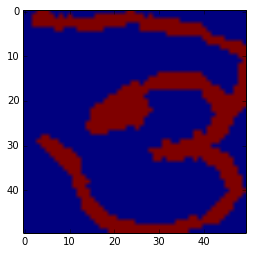

In [200]:
imgs_per_set = 3
def display_from_array(dataset, label):
        
    num_imgs, x, y = np.shape(dataset)
    
    for i in range(0, imgs_per_set):
    
        idx = np.random.randint(0, num_imgs - 1)

        print("Label %s" % label[idx])
        plt.imshow(dataset[idx])
        
display_from_array(train_dataset, train_labels)
display_from_array(test_dataset, test_labels)
display_from_array(valid_dataset, valid_labels)

In [201]:
pickle_file = 'bengaliOCR.pickle'

try:
  f = open(pickle_file, 'wb')
  save = {
    'train_dataset': train_dataset,
    'train_labels': train_labels,
    'valid_dataset': valid_dataset,
    'valid_labels': valid_labels,
    'test_dataset': test_dataset,
    'test_labels': test_labels,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

In [202]:
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 580232437


Trying an off-the-shelf classifier to see how well it fits

In [133]:
trn_size = 4000
test_size = 500

def fitLogisticReg(X, y):
    
    nsamples, nx, ny = np.shape(X)
    d2_X = X.reshape(nsamples, nx * ny)
    
    clf = LogisticRegression()
    clf.fit(d2_X, y)
    
    return clf

def calcAccuracy(clf, test_X, test_y):
    
    corr = 0
    total = 0
    
    nsamples, nx, ny = np.shape(test_X)
    d2_testX = test_X.reshape(nsamples, nx * ny)
    
    predict_y = clf.predict(d2_testX)
    
    for i, prediction in enumerate(predict_y):
        
        if prediction == test_y[i]:
            corr = corr + 1
            
        total = total + 1
        
    return corr * 100 / total

clf = fitLogisticReg(train_dataset[:trn_size - 1, : , : ], train_labels[ : trn_size - 1])

print("Accuracy = %d" % calcAccuracy(clf, test_dataset[ : test_size - 1, : , : ], test_labels[ : test_size - 1]), "%")

Accuracy = 37 %


An SVM seems to perform a poor fit, at least on this data set.

Reformat the data so that the input matrices become flat matrices, and the labels are represented as one-hot encodings.

In [190]:
image_size = 50
num_labels = 50

def reformat(dataset, labels):
  dataset = dataset.reshape((-1, image_size * image_size)).astype(np.float32)
  # Map 0 to [1.0, 0.0, 0.0 ...], 1 to [0.0, 1.0, 0.0 ...]
  labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
  return dataset, labels
train_dataset, train_labels = reformat(train_dataset, train_labels)
valid_dataset, valid_labels = reformat(valid_dataset, valid_labels)
test_dataset, test_labels = reformat(test_dataset, test_labels)
print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

Training set (50000, 2500) (50000, 50)
Validation set (5000, 2500) (5000, 50)
Test set (3000, 2500) (3000, 50)


Trying out a 1-hidden layer neural-network with ReLUs and 1024 hidden nodes, using stochastic gradient descent.

In [191]:
def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

In [192]:
def SGD_relu():
    
    batch_size = 128
    h = 1024
    h2 = 256
    num_steps = 4001
    beta = 0.0005

    graph = tf.Graph()
    with graph.as_default():

      # Input data. For the training data, we use a placeholder that will be fed
      # at run time with a training minibatch.
      tf_train_dataset = tf.placeholder(tf.float32,
                                        shape=(batch_size, image_size * image_size))
      tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
      tf_valid_dataset = tf.constant(valid_dataset)
      tf_test_dataset = tf.constant(test_dataset)

      # Variables.
      weights1 = tf.Variable(
        tf.truncated_normal([image_size * image_size, h], stddev = 0.02))
      biases1 = tf.Variable(tf.zeros([h]))
      weights2 = tf.Variable(
        tf.truncated_normal([h, h2], stddev = 0.03125))
      biases2 = tf.Variable(tf.zeros([h2]))
      weights3 = tf.Variable(
        tf.truncated_normal([h2, num_labels], stddev = 0.0884))
      biases3 = tf.Variable(tf.zeros([num_labels]))

      # Training computation.
        
      def model(dataset):
        
          logits1 = tf.matmul(dataset, weights1) + biases1

          relu_outputs1 = tf.nn.relu(logits1)

          logits2 = tf.matmul(relu_outputs1, weights2) + biases2
            
          relu_outputs2 = tf.nn.relu(logits2)
        
          logits3 = tf.matmul(relu_outputs2, weights3) + biases3
            
          return logits3
      
        
      train_logits = model(tf_train_dataset)
      valid_logits = model(tf_valid_dataset)
      test_logits = model(tf_test_dataset)


    
      loss = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(train_logits, tf_train_labels)) + beta * (tf.nn.l2_loss(weights1) + tf.nn.l2_loss(weights2) + tf.nn.l2_loss(weights3))


        
      # Optimizer.
      optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
      # Predictions for the training, validation, and test data.
      train_prediction = tf.nn.softmax(train_logits)
      valid_prediction = tf.nn.softmax(valid_logits)
      test_prediction = tf.nn.softmax(test_logits)
        
        
    num_steps = 8001

    with tf.Session(graph=graph) as session:
      tf.initialize_all_variables().run()
      print("Initialized")
      for step in range(num_steps):
        # Pick an offset within the training data, which has been randomized.
        # Note: we could use better randomization across epochs.
        offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
        # Generate a minibatch.
        batch_data = train_dataset[offset:(offset + batch_size), :]
        batch_labels = train_labels[offset:(offset + batch_size), :]
        # Prepare a dictionary telling the session where to feed the minibatch.
        # The key of the dictionary is the placeholder node of the graph to be fed,
        # and the value is the numpy array to feed to it.
        feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
        _, l, predictions = session.run(
          [optimizer, loss, train_prediction], feed_dict=feed_dict)
        if (step % 500 == 0):
          print("Minibatch loss at step %d: %f" % (step, l))
          print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
          print("Validation accuracy: %.1f%%" % accuracy(
            valid_prediction.eval(), valid_labels))
      print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(), test_labels))
    
SGD_relu()

Initialized
Minibatch loss at step 0: 4.212349
Minibatch accuracy: 1.6%
Validation accuracy: 2.1%


KeyboardInterrupt: 

This is a significant increase in accuracy compared to the simple linear logistic classifier. However, I am worried that the test dataset might be too small.

Next, I introduce dropout instead of L2-regularization as a way of controlling overfitting.

In [193]:
def SGD_relu_dropout():
    
    batch_size = 128
    h = 1024
    h2 = 256
    num_steps = 4001
    beta = 0.0005
    keep_prob = 0.75
    decay_step = 1000
    base = 0.86

    graph = tf.Graph()
    with graph.as_default():

      # Input data. For the training data, we use a placeholder that will be fed
      # at run time with a training minibatch.
      tf_train_dataset = tf.placeholder(tf.float32,
                                        shape=(batch_size, image_size * image_size))
      tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
      tf_valid_dataset = tf.constant(valid_dataset)
      tf_test_dataset = tf.constant(test_dataset)

      # Variables.
      weights1 = tf.Variable(
        tf.truncated_normal([image_size * image_size, h], stddev = 0.02))
      biases1 = tf.Variable(tf.zeros([h]))
      weights2 = tf.Variable(
        tf.truncated_normal([h, h2], stddev = 0.03125))
      biases2 = tf.Variable(tf.zeros([h2]))
      weights3 = tf.Variable(
        tf.truncated_normal([h2, num_labels], stddev = 0.0884))
      biases3 = tf.Variable(tf.zeros([num_labels]))
    
      global_step = tf.Variable(0)  # count the number of steps taken.
      learning_rate = tf.train.exponential_decay(0.5, global_step, decay_step, base)

      # Training computation.
        
      def model(dataset, useDropout = False):
        
          logits1 = tf.matmul(dataset, weights1) + biases1

          relu_outputs1 = tf.nn.relu(logits1)
        
          if useDropout:
                dropout_layer0 = tf.nn.dropout(relu_outputs1, keep_prob)
          else:
                dropout_layer0 = relu_outputs1

          logits2 = tf.matmul(dropout_layer0, weights2) + biases2
            
          relu_outputs2 = tf.nn.relu(logits2)
        
          if useDropout:
                dropout_layer = tf.nn.dropout(relu_outputs2, keep_prob)
          else:
                dropout_layer = relu_outputs2
        
          logits3 = tf.matmul(dropout_layer, weights3) + biases3
            
          return logits3
      
        
      train_logits = model(tf_train_dataset, True)
      valid_logits = model(tf_valid_dataset)
      test_logits = model(tf_test_dataset)


    
      loss = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(train_logits, tf_train_labels)) + beta * (tf.nn.l2_loss(weights1) + tf.nn.l2_loss(weights2) + tf.nn.l2_loss(weights3))


        
      # Optimizer.
      optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step = global_step)
      # Predictions for the training, validation, and test data.
      train_prediction = tf.nn.softmax(model(tf_train_dataset, False))
      valid_prediction = tf.nn.softmax(valid_logits)
      test_prediction = tf.nn.softmax(test_logits)
        
        
    num_steps = 20001

    with tf.Session(graph=graph) as session:
      tf.initialize_all_variables().run()
      print("Initialized")
      for step in range(num_steps):
        # Pick an offset within the training data, which has been randomized.
        # Note: we could use better randomization across epochs.
        offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
        # Generate a minibatch.
        batch_data = train_dataset[offset:(offset + batch_size), :]
        batch_labels = train_labels[offset:(offset + batch_size), :]
        # Prepare a dictionary telling the session where to feed the minibatch.
        # The key of the dictionary is the placeholder node of the graph to be fed,
        # and the value is the numpy array to feed to it.
        feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
        _, l, predictions = session.run(
          [optimizer, loss, train_prediction], feed_dict=feed_dict)
        if (step % 500 == 0):
          print("Minibatch loss at step %d: %f" % (step, l))
          print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
          print("Validation accuracy: %.1f%%" % accuracy(
            valid_prediction.eval(), valid_labels))
      print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(), test_labels))
    
SGD_relu_dropout()


Initialized
Minibatch loss at step 0: 4.272541
Minibatch accuracy: 0.0%
Validation accuracy: 3.2%
Minibatch loss at step 500: 1.450829
Minibatch accuracy: 71.9%
Validation accuracy: 71.2%


KeyboardInterrupt: 

Dropout also helps improve performance by a few percentage points. Interestingly, I also discovered that using the Adagrad optimizer instead of regular gradient descent helped improve performance.

Introducing dropout on the first hidden layer as well, and annealing the learning rate using a decay function further pushes up the accuracy to 85.6%. This has been achieved using a neural network with only 2 hidden layers.

Next, I introduce a very simple convnet with maxpooling. This net has two convolutional layers followed by 1 fully-connected layer. I do not include dropout or other regularization techniques.

In [180]:
with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  train_dataset = save['train_dataset']
  train_labels = save['train_labels']
  valid_dataset = save['valid_dataset']
  valid_labels = save['valid_labels']
  test_dataset = save['test_dataset']
  test_labels = save['test_labels']
  del save  # hint to help gc free up memory
  print('Training set', train_dataset.shape, train_labels.shape)
  print('Validation set', valid_dataset.shape, valid_labels.shape)
  print('Test set', test_dataset.shape, test_labels.shape)

Training set (50000, 50, 50, 1) (50000, 1, 50)
Validation set (5000, 50, 50, 1) (5000, 1, 50)
Test set (3000, 50, 50, 1) (3000, 1, 50)


In [179]:
image_size = 50
num_labels = 50
num_channels = 1 # grayscale

import numpy as np

def reformat(dataset, labels):
  dataset = dataset.reshape(
    (-1, image_size, image_size, num_channels)).astype(np.float32)
  labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
  return dataset, labels
train_dataset, train_labels = reformat(train_dataset, train_labels)
valid_dataset, valid_labels = reformat(valid_dataset, valid_labels)
test_dataset, test_labels = reformat(test_dataset, test_labels)
print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

Training set (50000, 50, 50, 1) (50000, 1, 1, 50)
Validation set (5000, 50, 50, 1) (5000, 1, 1, 50)
Test set (3000, 50, 50, 1) (3000, 1, 1, 50)


NameError: global name 'num_channels' is not defined